<h3 align = center>BIGMART SALES PREDICTION USING MACHINE LEARNING MODEL.</h3>

<h3>PROBLEM STATEMENT AND DATA COLLECTION.</h3>
BigMart operates a chain of retail stores across multiple locations. The company wants to understand the factors that influence the sales of its products. This understanding will help them predict future sales, make data-driven decisions, and increase profitability. The challenge is to build a predictive model to forecast the sales of products based on historical sales data and other influencing factors.

https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

<h3>IMPORT NECESSARY LIBRARIES.</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

<h3>LOAD THE DATASET TO A DATAFRAME.</h3>

In [3]:
# Load the training and test dataset to a dataframe.
df_train = pd.read_csv("./archive/Train.csv")
df_test = pd.read_csv("./archive/Train.csv")

<h3>EXPLORATORY DATA ANALYSIS (EDA).</h3>

In [4]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
df_train.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
# Handling missing values.
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

In [10]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


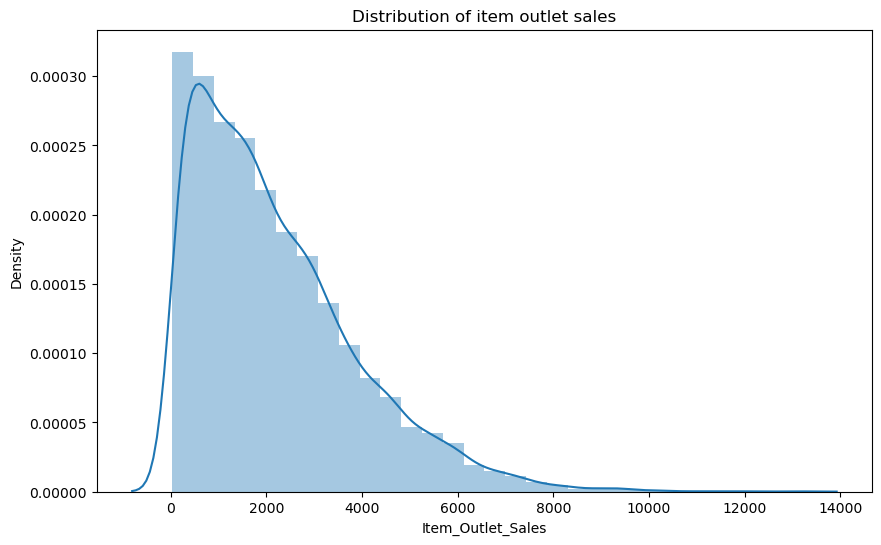

In [12]:
# Distribution of target variable.
plt.figure(figsize=(10,6))
sns.distplot(df_train['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of item outlet sales')
plt.show()

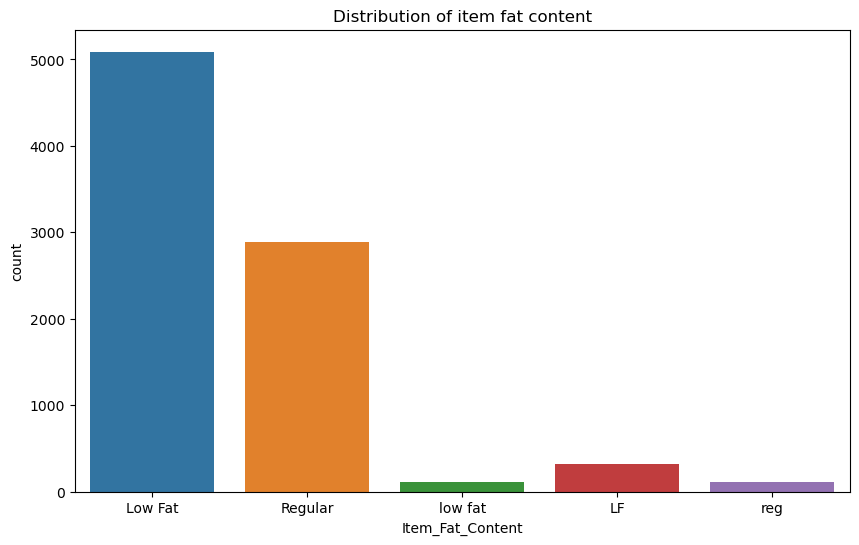

In [13]:
# Categorical features analysis.
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.title('Distribution of item fat content')
plt.show()

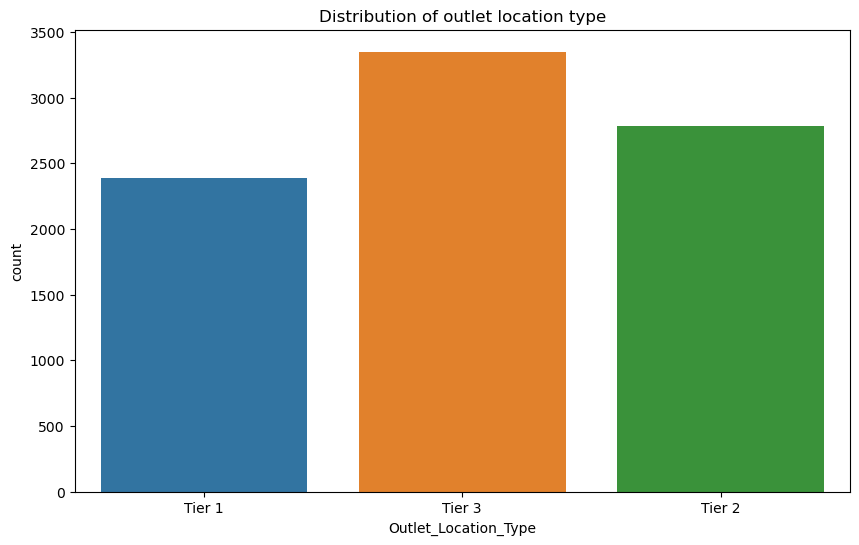

In [14]:
# Categorical features analysis.
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Location_Type', data=df_train)
plt.title('Distribution of outlet location type')
plt.show()

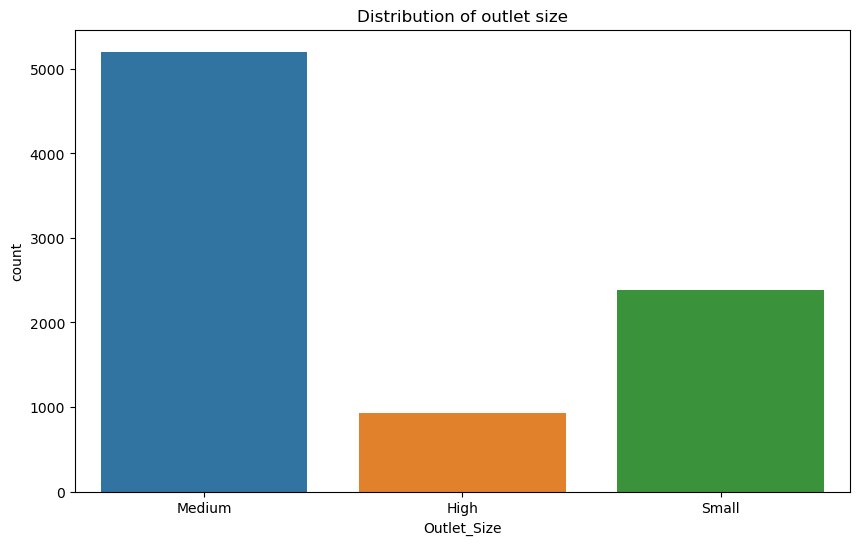

In [15]:
# Categorical features analysis.
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size', data=df_train)
plt.title('Distribution of outlet size')
plt.show()

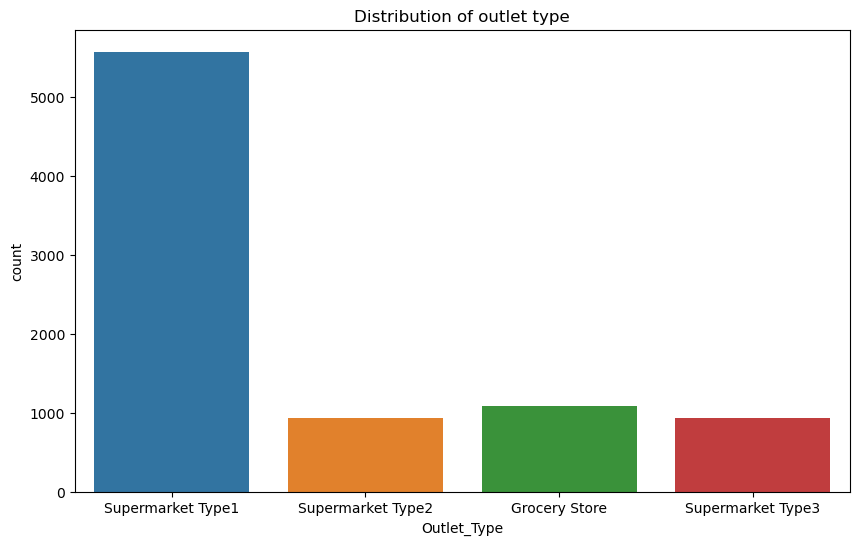

In [16]:
# Categorical features analysis.
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', data=df_train)
plt.title('Distribution of outlet type')
plt.show()

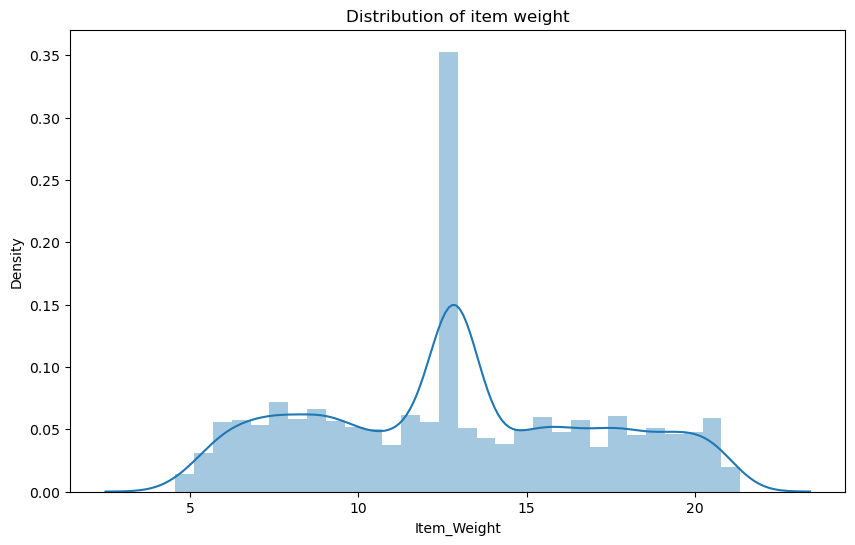

In [17]:
# Numerical features analysis.
plt.figure(figsize=(10,6))
sns.distplot(df_train['Item_Weight'].dropna(), kde=True, bins=30)
plt.title('Distribution of item weight')
plt.show()

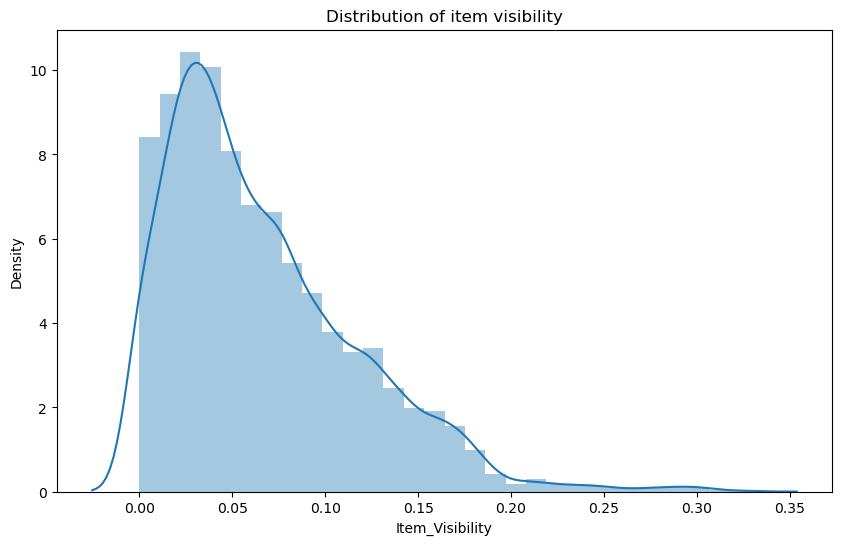

In [18]:
# Numerical features analysis.
plt.figure(figsize=(10,6))
sns.distplot(df_train['Item_Visibility'], kde=True, bins=30)
plt.title('Distribution of item visibility')
plt.show()

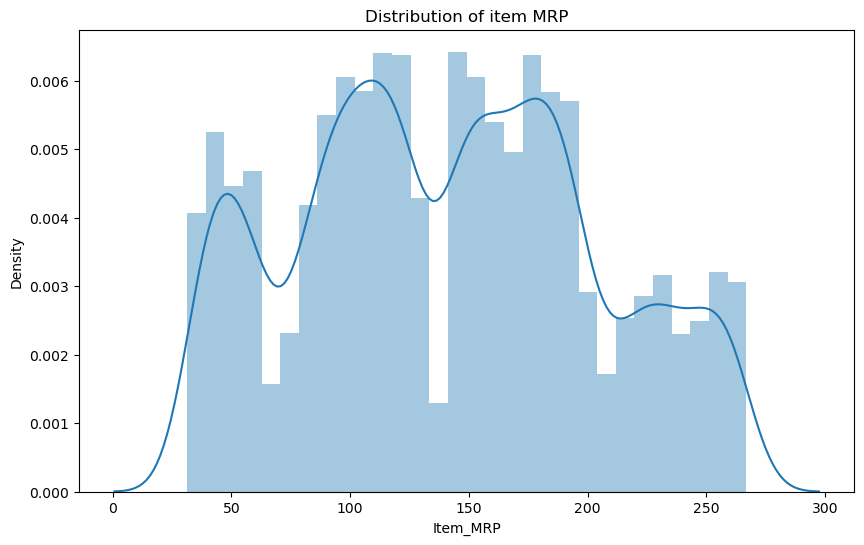

In [19]:
# Numerical features analysis.
plt.figure(figsize=(10,6))
sns.distplot(df_train['Item_MRP'], kde=True, bins=30)
plt.title('Distribution of item MRP')
plt.show()

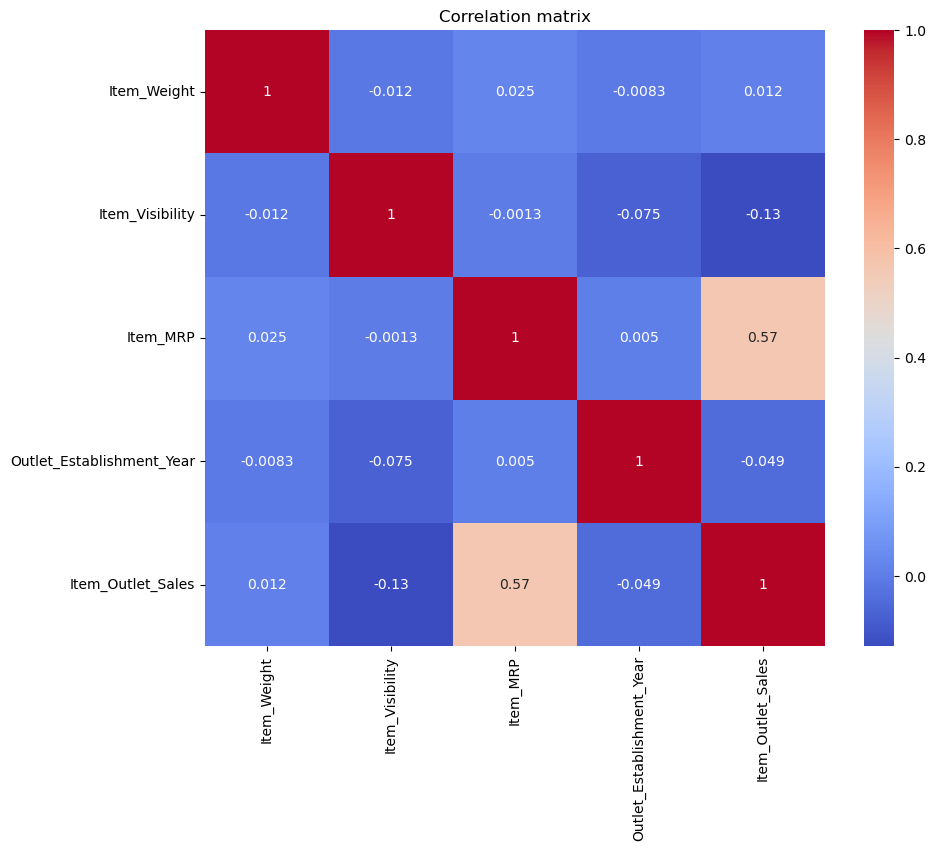

In [20]:
# Correlation analysis.
plt.figure(figsize=(10,8))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

<h3>DATA PREPROCESSING.</h3>

In [21]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
# Categorize the ingredients of Item_Fat_Content.
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Encoding categorical variable.**

In [25]:
le = LabelEncoder()
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])
df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

**Feature engineering.**

In [26]:
df_train['Item_Visibility_MeanRatio'] = df_train.apply(lambda x: x['Item_Visibility']/df_train.loc[df_train['Item_Identifier'] == x['Item_Identifier'], 'Item_Visibility'].mean(), axis=1)

In [27]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,0.922960
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1.003057
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,0.831990
3,FDX07,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,0.000000
4,NCD19,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,0.920247
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,1.000657
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,0.999512
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1.203292


**Feature selection.**

In [28]:
X = df_train.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
Y = df_train['Item_Outlet_Sales']

In [29]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_MeanRatio
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,0.922960
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,1.003057
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,0.831990
3,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,0.000000
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,0.920247
8519,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,1.000657
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,0.999512
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1.203292


In [30]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**Train test split.**

In [31]:
# Split the dataset into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [32]:
print(X.shape, Y.shape, X_train.shape, X_test.shape)

(8523, 11) (8523,) (6818, 11) (1705, 11)


**Model building.**

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

**Model evaluation.**

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 1086.751060813234
R2 Score: 0.5654742917574472


**Hyperparameter tuning.**

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(Y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_test, y_pred_best)

print(f"Best RMSE: {rmse_best}")
print(f"Best R2 Score: {r2_best}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RMSE: 1025.9495860156064
Best R2 Score: 0.6127357817609018
